**Context**<br>
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique like (KMeans Clustering Algorithm, Hierarchical Clustering and Density Based Clustering) in the simplest form.

**Content**<br>
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problem Statement**<br>
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

**Inspiration**<br>
By the end of this case study , you would be able to answer below questions. 1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way. 2- Who are your target customers with whom you can start marketing strategy [easy to converse] 3- How the marketing strategy works in real world

**Variables**<br>
CustomerID             :Unique ID assigned to the customer<br>
Gender                 :Gender of the customer<br>
Age                    :Age of the customer<br>
Annual Income (k$)     :Annual Income of the customee <br>
Spending Score (1-100) :Score assigned by the mall based on customer behavior and spending nature <br>

## Importing Libraries.

In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 

## Data Exploration

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Visualization

C:\Users\chund\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



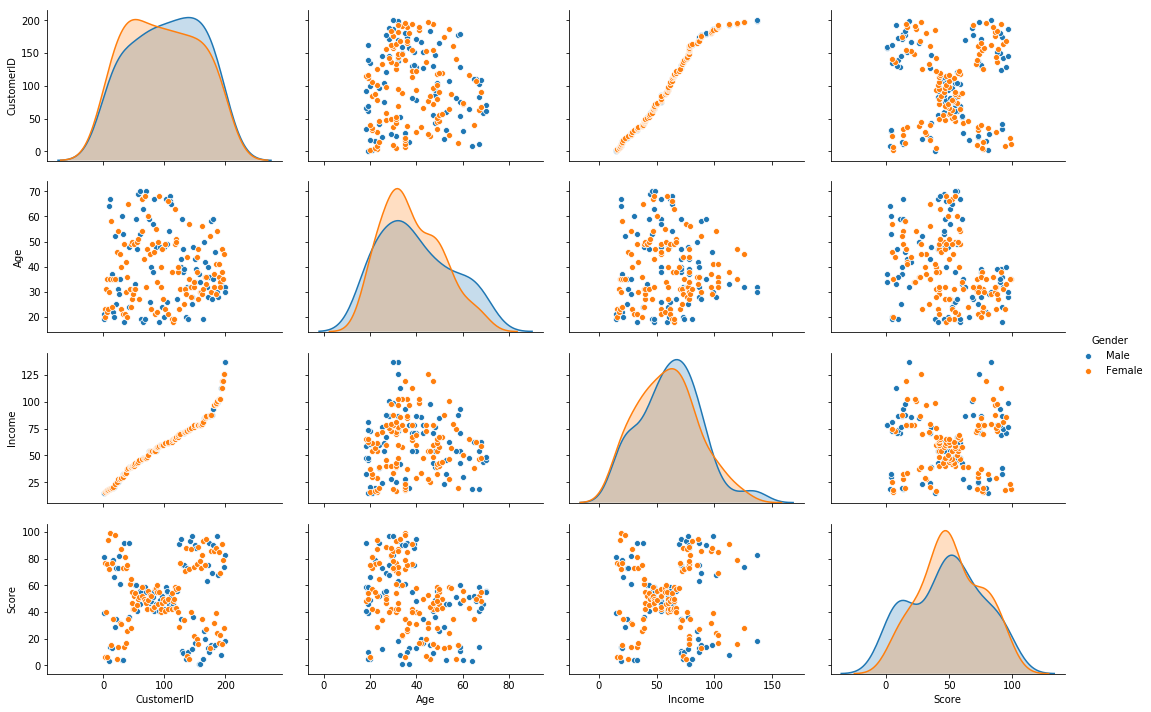

In [16]:
sns.pairplot(df, hue='Gender', aspect=1.5)
plt.show()

We can clearly see that Age, Annual Income, and  Spending Score are variables that have clusters, we can also observe that gender and customerId does not make differences in the clustering(i.e they are unrelated), hence we can drop them.

In [17]:
df1 = df.drop(['CustomerID', 'Gender'], axis=1)

## KMeans CLustering

Text(0, 0.5, 'Inertia')

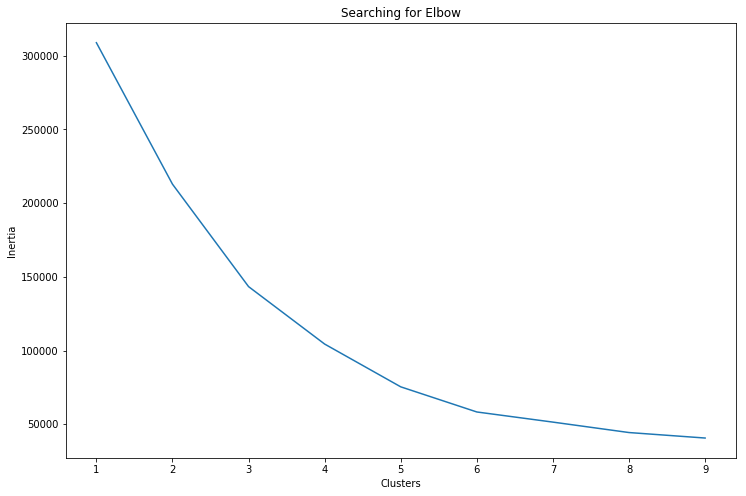

In [18]:
clusters = []
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(df1)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

We can clearly see from the Elbow chart that there is a considerable change in Inertial at 3 and 5 clusters.

Let us check for 3 and 5 and then decide the optimal one

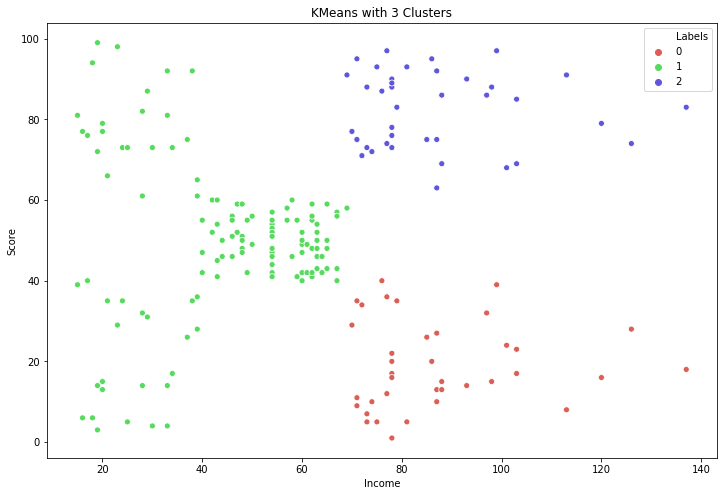

In [20]:
km3 = KMeans(n_clusters=3).fit(df1)

df1['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

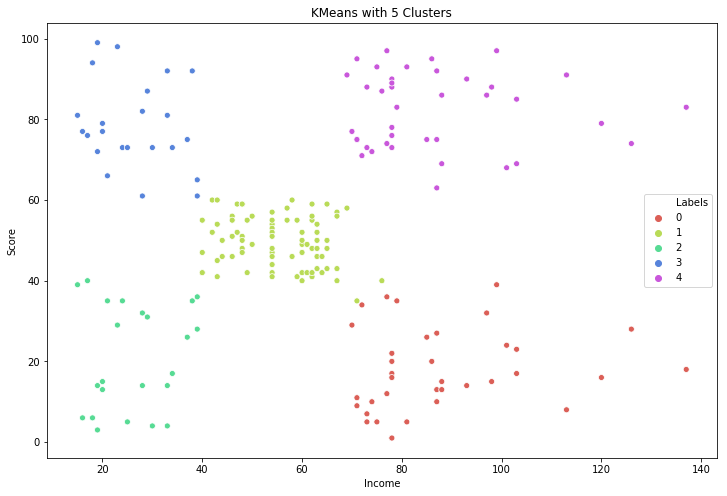

In [19]:
km5 = KMeans(n_clusters=5).fit(df1)

df1['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

It can be seen that the KMeans with 5 cluster is good.

It can be interpretted as 

Lable 0: high income and low spending.<br>
Lable 1: moderate income and moderate spending.<br>
Lable 2: low income and spending.<br>
Lable 3: low income but high spending.<br>
Lable 4: high income and spending.<br>

## Hierarchical Clustering

Since the data is not large hence we can use Hierarchical Clustering also

In [23]:
#we need to define the distance and linkage type.
dist = distance_matrix(df1, df1) 
Z = hierarchy.linkage(dist, 'complete')

C:\Users\chund\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



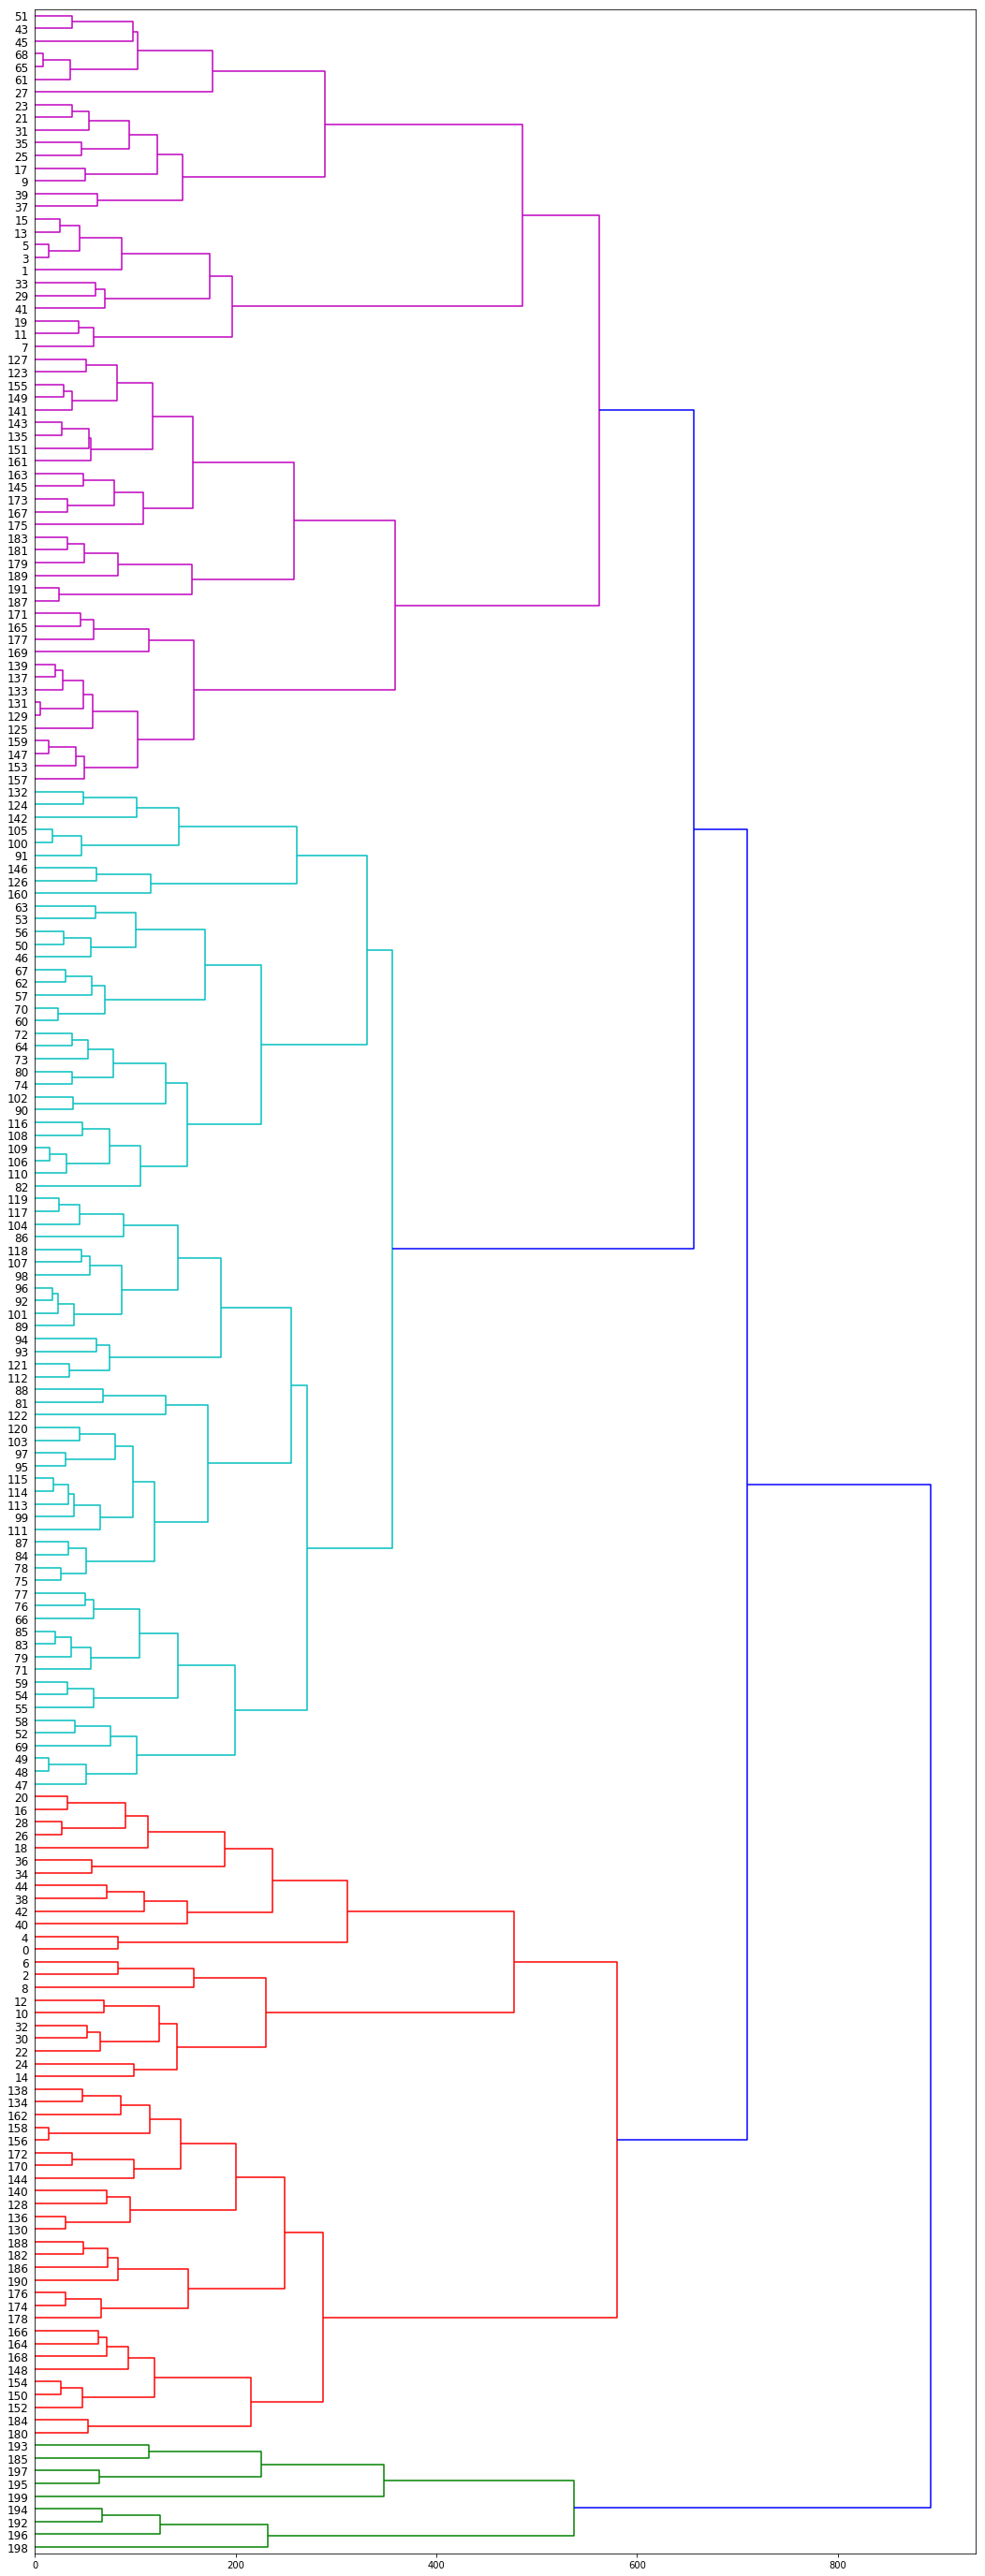

In [24]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

## density based method

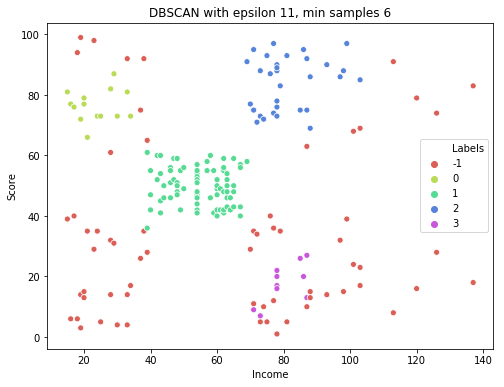

In [27]:
db = DBSCAN(eps=11, min_samples=6).fit(df1)

df1['Labels'] = db.labels_
plt.figure(figsize=(8,6))
sns.scatterplot(df1['Income'], df1['Score'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()